In [1]:
import os
import itertools
import cv2
import glob, random
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import sklearn
import clusteringv15 as myf

print("Setting up detection pipeline.\n")

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=160, margin=0)

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

Setting up detection pipeline.



<ipython-input-2-aeca402ca435>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


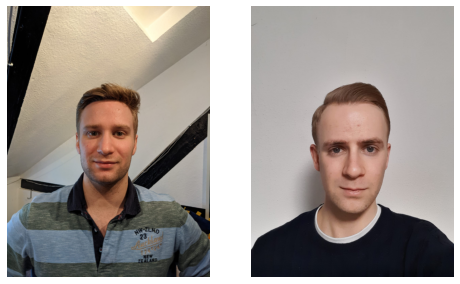

In [2]:
input1 = Image.open('./data/input_data/felix01.jpeg')
input1_cropped = mtcnn(input1,save_path='./data/input_data_aligned/felix01.jpg')
input1_embedding = resnet(input1_cropped.unsqueeze(0))

input2 = Image.open('./data/input_data/tristan01.jpeg')
input2_cropped = mtcnn(input2,save_path='./data/input_data_aligned/tristan01.jpg')
input2_embedding = resnet(input2_cropped.unsqueeze(0))

fig, axarray = plt.subplots(1,2,figsize=(8, 6))
axarray[0].imshow(input1)
axarray[0].axis('off')
axarray[1].imshow(input2)
axarray[1].axis('off')
fig.show()

Score: 0.44349957
Threshold: 0.7
Its not a match!


<ipython-input-3-3845d31749b1>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


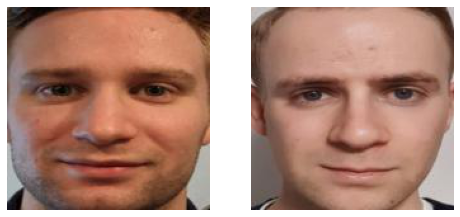

In [3]:
cos = torch.nn.CosineSimilarity()

cos_score = cos(input1_embedding,input2_embedding)
npscore = cos_score.detach().numpy()[0]

threshold = 0.7
print('Score: ' + str(npscore))
print('Threshold: ' + str(threshold))
if npscore < threshold: print('Its not a match!')
else: print('Its a match!')

img1 = Image.open('./data/input_data_aligned/felix01.jpg')
img2 = Image.open('./data/input_data_aligned/tristan01.jpg')

fig, axarray = plt.subplots(1,2,figsize=(8, 6))
axarray[0].imshow(img1)
axarray[0].axis('off')
axarray[1].imshow(img2)
axarray[1].axis('off')
fig.show()

<ipython-input-4-73ffbb420709>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


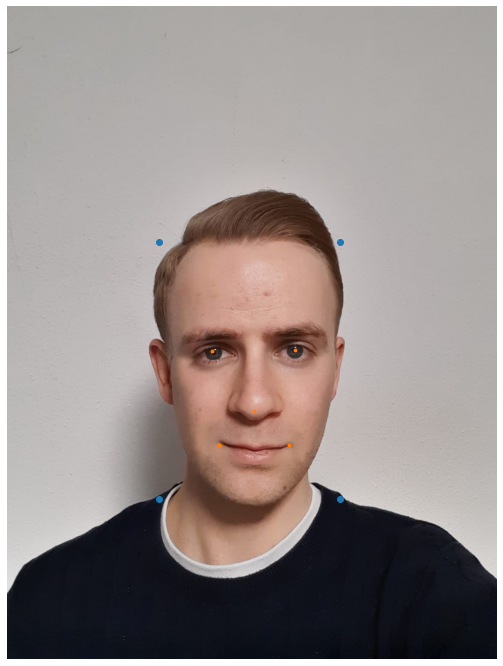

In [4]:
boxes1, probs1, landmarks1 = mtcnn.detect(input1, landmarks=True)
boxes2, probs2, landmarks2 = mtcnn.detect(input2, landmarks=True)

# Visualize
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(input2)
ax.axis('off')

for box, landmark in zip(boxes2, landmarks2):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
plt.axis('off');
fig.show()

In [5]:
# Detect face
eyes1, nose1, mouth1 = myf.get_feature_bboxes(img1, boxes1, landmarks1,save_path='./data/temp/landmarks/face1')
eyes2, nose2, mouth2 = myf.get_feature_bboxes(img2, boxes2, landmarks2,save_path='./data/temp/landmarks/face2')

Clear landmarks_savepath.
Clear landmarks_savepath.


In [6]:
# Saving the landmarks from face 2 in image files, to put them on top of face 1
eyes2_img = Image.open('./data/temp/landmarks/face2eyes.jpg')
nose2_img = Image.open('./data/temp/landmarks/face2nose.jpg')
mouth2_img = Image.open('./data/temp/landmarks/face2mouth.jpg')

# Creating images with switches landmarks
face1_eyes2 = img1.copy()
face1_eyes2.paste(eyes2_img.resize((eyes1[2]-eyes1[0], eyes1[3]-eyes1[1])), eyes1)
face1_eyes2.save('./data/temp/switch/face1_eyes2.jpg')

face1_nose2 = img1.copy()
face1_nose2.paste(nose2_img.resize((nose1[2]-nose1[0], nose1[3]-nose1[1])), nose1)
face1_nose2.save('./data/temp/switch/face1_nose2.jpg')

face1_mouth2 = img1.copy()
face1_mouth2.paste(mouth2_img.resize((mouth1[2]-mouth1[0], mouth1[3]-mouth1[1])), mouth1)
face1_mouth2.save('./data/temp/switch/face1_mouth2.jpg')

face1_face2 = img1.copy()
face1_face2.paste(eyes2_img.resize((eyes1[2]-eyes1[0], eyes1[3]-eyes1[1])), eyes1)
face1_face2.paste(nose2_img.resize((nose1[2]-nose1[0], nose1[3]-nose1[1])), nose1)
face1_face2.paste(mouth2_img.resize((mouth1[2]-mouth1[0], mouth1[3]-mouth1[1])), mouth1)
face1_face2.save('./data/temp/switch/face1_face2.jpg')

Score: 0.494693
Threshold: 0.7
Its not a match!


<ipython-input-7-1c8f0f4a2b45>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Score: 0.49142796
Threshold: 0.7
Its not a match!
Score: 0.4931248
Threshold: 0.7
Its not a match!
Score: 0.5773307
Threshold: 0.7
Its not a match!


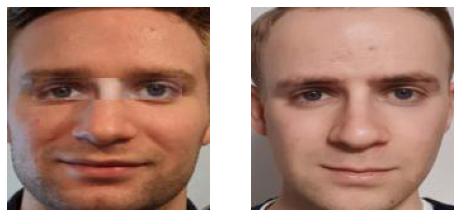

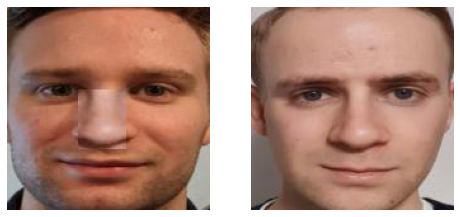

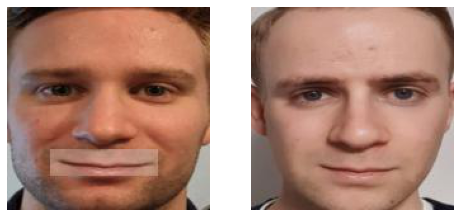

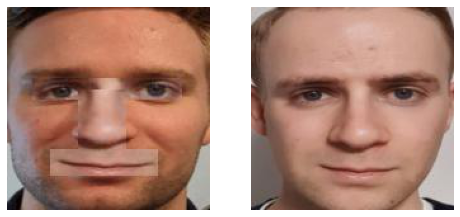

In [7]:
# Calculating the cosine similarity of the faces with switches images with the original pictures
switched_facial_landmarks = ['face1_eyes2.jpg', 'face1_nose2.jpg', 'face1_mouth2.jpg', 'face1_face2.jpg']

for switched_image in switched_facial_landmarks:
    switched_img = Image.open('./data/temp/switch/' + switched_image)

    input1_embedding = resnet(mtcnn(switched_img).unsqueeze(0))
    input2_embedding = resnet(mtcnn(img2).unsqueeze(0))

    cos = torch.nn.CosineSimilarity()

    cos_score = cos(input1_embedding,input2_embedding)
    npscore = cos_score.detach().numpy()[0]

    threshold = 0.7
    print('Score: ' + str(npscore))
    print('Threshold: ' + str(threshold))
    if npscore < threshold: print('Its not a match!')
    else: print('Its a match!')

    fig, axarray = plt.subplots(1,2,figsize=(8, 6))
    axarray[0].imshow(switched_img)
    axarray[0].axis('off')
    axarray[1].imshow(img2)
    axarray[1].axis('off')
    fig.show()